In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('dataset\student_info.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Preparing X and Y columns....

x = data.drop('math_score', axis=1)
y = data['math_score']

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
# Creating column transform with 3 types of transforms.

num_feature = x.select_dtypes(exclude='object').columns
categorical_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_feature = StandardScaler()
oh_transform = OneHotEncoder()

preprocesser = ColumnTransformer(
    [
    ('OneHotEncoding', oh_transform, categorical_features),
    ('StandardScaler', numerical_feature, num_feature),
    ]
)

In [6]:
x = preprocesser.fit_transform(x)
x.shape

(1000, 19)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [30]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [31]:
# Create an Evaluate Function to give all metrics after model Training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4196
- Mean Absolute Error: 4.3262
- R2 Score: 0.8697
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0612
- Mean Absolute Error: 3.9669
- R2 Score: 0.8956


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6245
- Mean Absolute Error: 5.2418
- R2 Score: 0.8053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4650
- Mean Absolute Error: 5.0935
- R2 Score: 0.8297


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4001
- Mean Absolute Error: 4.3195
- R2 Score: 0.8706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0657
- Mean Absolute Error: 3.9876
- R2 Score: 0.8954


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9096
- Mean Absolute Error: 4.6985
- R2 Score: 0.8450
-----------------------

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.895632
2,Ridge,0.895447
7,CatBoosting Regressor,0.876273
5,Random Forest Regressor,0.854606
8,AdaBoost Regressor,0.842507
6,XGBRegressor,0.840409
1,Lasso,0.829706
3,K-Neighbors Regressor,0.805870
4,Decision Tree,0.742681


In [34]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.56


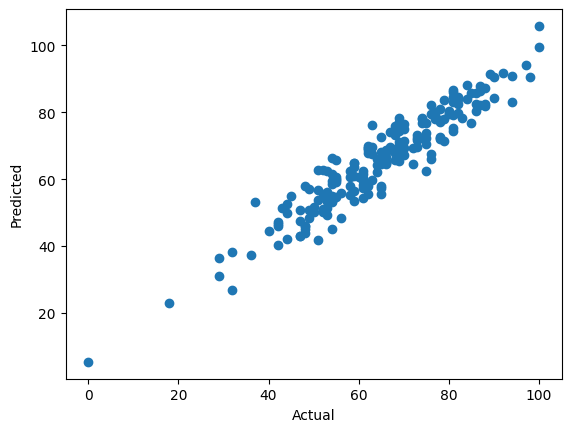

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

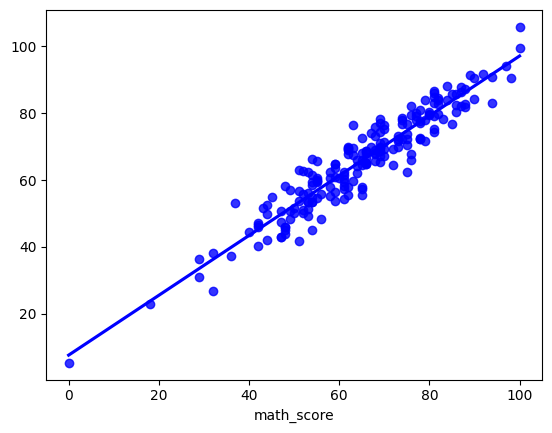

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
507,55,59.921875,-4.921875
818,60,60.687500,-0.687500
452,65,64.609375,0.390625
368,44,49.843750,-5.843750
242,56,48.250000,7.750000
...,...,...,...
430,64,64.265625,-0.265625
874,43,51.500000,-8.500000
550,79,71.531250,7.468750
608,61,61.562500,-0.562500
